In [1]:
import cv2
import gzip
import json

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

import os
import sys

import pandas as pd
import PIL
from collections import OrderedDict
from pathlib import Path

import pydicom
from pydicom._dicom_dict import DicomDictionary
import seaborn as sns

from tqdm.notebook import tqdm

from Dicom_Meta_Praser import DicomParser

In [2]:
#show the actual path of the notebook
print(os.getcwd())

/system/user/hagenede/MIMIC_CXR_bachelor/preprocess_dicoms


In [3]:
path_sub = 'data/MIMIC_CXR/MIMIC_CXR/physionet.org/files/mimic-cxr/2.0.0/files'

In [4]:
# The class DicomParser is used to parse the dicom files and save them as csv and json files
parser = DicomParser(path_sub, 'data/csv//metadata/metadata_dicom.csv', 'data/csv/metadata/metadata_dicom.json')
parser.parse()
#show the first 5 rows of the csv file
df_dicom = pd.read_csv('data/csv/metadata/metadata_dicom.csv')
df_dicom


/tmp/ipykernel_1249822/3217053654.py:5: DtypeWarning: Columns (110,111,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dicom = pd.read_csv('/system/user/publicdata/MIMIC_CXR/hageneder/metadata/metadata_dicom.csv')


,dicom,524293,524296,524310,524312,524320,524321,524322,524323,524336,...,4194912,1577272,1578288,1577040,4195073,4195086,4198403,1577236,1605968,1577328
0,d067947d-61c60fe1-b73bc826-356d3d2c-fd22bb48,ISO_IR 100,"['DERIVED', 'PRIMARY']",1.2.840.10008.5.1.4.1.1.1.1,2.25.277017241430093109593486277289242869036,21460430,21460430,21460430.0,21460430,190109.453,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,94cfab5d-c84c24dc-ebd79acf-b51bfecb-df30081b,ISO_IR 100,"['ORIGINAL', 'PRIMARY']",1.2.840.10008.5.1.4.1.1.1.1,2.25.197804024548134877847105667587095920331,21460312,21460312,21460312.0,21460312,165315.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,78c46a20-ac46fddc-da7e8f14-eff8d7a7-4ffec0a5,ISO_IR 100,"['ORIGINAL', 'PRIMARY']",1.2.840.10008.5.1.4.1.1.1.1,2.25.160527202202498408243316037521203845031,21460312,21460312,21460312.0,21460312,165315.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,432a51bb-85350756-4fcac5c3-20fcb8d9-11c91668,ISO_IR 100,"['ORIGINAL', 'PRIMARY']",1.2.840.10008.5.1.4.1.1.1.1,2.25.89278009917718104015032604424075524313,21460312,21460312,21460312.0,21460312,165315.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68ccd799-61e98428-3c7d8e41-6cbc342c-3426519b,ISO_IR 100,"['DERIVED', 'PRIMARY']",1.2.840.10008.5.1.4.1.1.1.1,2.25.139303312991048128508678128717025522732,21460502,21460502,21460502.0,21460502,52606.468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377105,f6ccd72a-bdf76734-274736e7-71dc7f4b-74028b4a,ISO_IR 100,"['ORIGINAL', 'PRIMARY', '']",1.2.840.10008.5.1.4.1.1.1.1,2.25.328053679626669703629647481850520436555,21890709,21890709,21890709.0,21890709,95947.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377106,6d78f490-8978ed36-1db18555-d1299472-489988f7,ISO_IR 100,"['ORIGINAL', 'PRIMARY', '']",1.2.840.10008.5.1.4.1.1.1.1,2.25.145513887522923660155034812441747362930,21890709,21890709,21890709.0,21890709,95947.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377107,cbfca10f-79eedbb0-55762c24-c1bacd40-410cb689,ISO_IR 100,"['ORIGINAL', 'PRIMARY', '']",1.2.840.10008.5.1.4.1.1.1.1,2.25.271145008646793167920963614987647634752,21890405,21890405,21890405.0,21890405,111010.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377108,750b52ea-0a31513e-1eb47517-a4174b8d-494ec362,ISO_IR 100,"['ORIGINAL', 'PRIMARY', '']",1.2.840.10008.5.1.4.1.1.1.1,2.25.155578472472411039138682728702572710797,21890405,21890405,21890405.0,21890405,111010.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#load the created json file
with open('data/csv/metadata/metadata_dicom.json') as read_file:
    data = json.load(read_file)

dicom_metadata = dict()

# convert the length of the list from 1 itme to a single dictionary
for i in data:
    for k, v in i.items():
        dicom_metadata[k] = v

del data

# find all unique keys in the dicom metadata
# and find all top level tags
jason_keys = [list(dicom_metadata[x].keys()) for x in dicom_metadata]
jason_keys = set([item for sublist in jason_keys for item in sublist])
jason_keys = list(jason_keys)
jason_keys.sort()

n_attr = len(jason_keys)
print(f'Found {n_attr} unique attributes in the dicom metadata.')
#one example of the dicom metadata
dicom_metadata['174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962']

Found 10 unique attributes in the dicom metadata.


{'528434': [{'524544': 'C11',
   '524546': 'CLP',
   '524548': 'CHEST (PA AND LAT)'}],
 '533016': [{'524544': 'T-D3000',
   '524546': 'SNM3',
   '524548': 'Chest',
   '524549': 'DCMR',
   '524550': '20020904',
   '524559': '4031'}],
 '1179748': [{'524544': '113100',
   '524546': 'DCM',
   '524547': '20170914',
   '524548': 'Basic Application Confidentiality Profile'},
  {'524544': '113105',
   '524546': 'DCM',
   '524547': '20170914',
   '524548': 'Clean Descriptors Option'},
  {'524544': '113107',
   '524546': 'DCM',
   '524547': '20170914',
   '524548': 'Retain Longitudinal Temporal Information Modified Dates Option'},
  {'524544': '113101',
   '524546': 'DCM',
   '524547': '20170914',
   '524548': 'Clean Pixel Data Option'},
  {'524544': '113103',
   '524546': 'DCM',
   '524547': '20170914',
   '524548': 'Clean Graphics Option'}],
 '5505568': [{'524544': 'R-102CD',
   '524546': 'SNM3',
   '524548': 'lateral',
   '524549': 'DCMR',
   '524550': '20040302',
   '524559': '4010'}],
 '550

## after some research I found that the most important tags are the following:
- 5506064 patient orientation
- 5505568 position
- 528434 procedure code sequence
- 524548 ontology code

i will now show only the values of these tags

In [6]:
columns = ['5506064', '5505568', '528434']
dcm_meta = {}
for i, j in dicom_metadata.items():
    dcm_meta[i] = [j[x][0]['524548'] for x in columns if x in j and len(j[x]) > 0]

dcm_meta = pd.DataFrame.from_dict(dcm_meta, orient='index', columns=columns)
dcm_meta.head()

# for more readedbleity I will change the values of the tags to the values of the ontology code
dcm_meta.columns = [DicomDictionary[int(x)][-1] + '_' + DicomDictionary[int('524548')][-1] for x in columns]
dcm_meta.head(2)

,PatientOrientationCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,ProcedureCodeSequence_CodeMeaning
d067947d-61c60fe1-b73bc826-356d3d2c-fd22bb48,antero-posterior,CHEST (PORTABLE AP),None
94cfab5d-c84c24dc-ebd79acf-b51bfecb-df30081b,Recumbent,postero-anterior,CHEST (PA AND LAT)


In [7]:
target_path = 'data/csv/MIMIC_CXR/hageneder/jpg_path_fingings.csv'
df_targets = pd.read_csv(target_path)
df_targets.insert(2, 'jpg_name', df_targets['jpg_path'].apply(lambda x: x.split('/')[-1][:-4]))
df_targets['jpg_name'] = df_targets['jpg_name'].apply(lambda x: x.split('.')[0])
df_targets

,study_id,jpg_path,jpg_name,Finding
0,50414267,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,0
1,50414267,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,0
2,53189527,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,0
3,53189527,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,0
4,53911762,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,0
...,...,...,...,...
377090,57132437,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,428e2c18-5721d8f3-35a05001-36f3d080-9053b83c,0
377091,57132437,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,58c403aa-35ff8bd9-73e39f54-8dc9cc5d-e0ec3fa9,0
377092,55368167,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,58766883-376a15ce-3b323a28-6af950a0-16b793bd,1
377093,58621812,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,7ba273af-3d290f8d-e28d0ab4-484b7a86-7fc12b08,1


In [8]:
# Check if all paths exist
all_paths_exist = all([os.path.exists(entry.path) for entry in os.scandir() if entry.name in df_targets['jpg_path'].values])

# Print the result
print(f"All paths exist: {all_paths_exist}")

All paths exist: True


In [9]:
# Assuming your DataFrame is named "dcm_meta"
dcm_meta.reset_index(inplace=True)
dcm_meta.rename(columns={'index': 'jpg_name'}, inplace=True)
dcm_meta

,jpg_name,PatientOrientationCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,ProcedureCodeSequence_CodeMeaning
0,d067947d-61c60fe1-b73bc826-356d3d2c-fd22bb48,antero-posterior,CHEST (PORTABLE AP),None
1,94cfab5d-c84c24dc-ebd79acf-b51bfecb-df30081b,Recumbent,postero-anterior,CHEST (PA AND LAT)
2,78c46a20-ac46fddc-da7e8f14-eff8d7a7-4ffec0a5,Recumbent,left lateral,CHEST (PA AND LAT)
3,432a51bb-85350756-4fcac5c3-20fcb8d9-11c91668,Recumbent,left lateral,CHEST (PA AND LAT)
4,68ccd799-61e98428-3c7d8e41-6cbc342c-3426519b,Erect,antero-posterior,CHEST (PORTABLE AP)
...,...,...,...,...
377105,f6ccd72a-bdf76734-274736e7-71dc7f4b-74028b4a,Erect,postero-anterior,CHEST (PA AND LAT)
377106,6d78f490-8978ed36-1db18555-d1299472-489988f7,Erect,left lateral,CHEST (PA AND LAT)
377107,cbfca10f-79eedbb0-55762c24-c1bacd40-410cb689,Erect,postero-anterior,CHEST (PA AND LAT)
377108,750b52ea-0a31513e-1eb47517-a4174b8d-494ec362,Erect,left lateral,CHEST (PA AND LAT)


In [10]:
#merg the two dataframes dcm_meta and df_targets on the jpg_name column and save it as a new dataframe
df = pd.merge(dcm_meta, df_targets, on='jpg_name')

In [11]:
df

,jpg_name,PatientOrientationCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,ProcedureCodeSequence_CodeMeaning,study_id,jpg_path,Finding
0,d067947d-61c60fe1-b73bc826-356d3d2c-fd22bb48,antero-posterior,CHEST (PORTABLE AP),None,57682201,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,1
1,94cfab5d-c84c24dc-ebd79acf-b51bfecb-df30081b,Recumbent,postero-anterior,CHEST (PA AND LAT),55032644,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,0
2,78c46a20-ac46fddc-da7e8f14-eff8d7a7-4ffec0a5,Recumbent,left lateral,CHEST (PA AND LAT),55032644,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,0
3,432a51bb-85350756-4fcac5c3-20fcb8d9-11c91668,Recumbent,left lateral,CHEST (PA AND LAT),55032644,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,0
4,68ccd799-61e98428-3c7d8e41-6cbc342c-3426519b,Erect,antero-posterior,CHEST (PORTABLE AP),54345212,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,1
...,...,...,...,...,...,...,...
377090,f6ccd72a-bdf76734-274736e7-71dc7f4b-74028b4a,Erect,postero-anterior,CHEST (PA AND LAT),59644954,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,0
377091,6d78f490-8978ed36-1db18555-d1299472-489988f7,Erect,left lateral,CHEST (PA AND LAT),59644954,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,0
377092,cbfca10f-79eedbb0-55762c24-c1bacd40-410cb689,Erect,postero-anterior,CHEST (PA AND LAT),55225072,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,0
377093,750b52ea-0a31513e-1eb47517-a4174b8d-494ec362,Erect,left lateral,CHEST (PA AND LAT),55225072,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,0


In [12]:
#compare dcim_meta and df_targets on the jpg_name column and print the rows that are not in df_targets
dcm_meta[~dcm_meta['jpg_name'].isin(df_targets['jpg_name'])]
#count the number of rows that are not in df_targets
len(dcm_meta[~dcm_meta['jpg_name'].isin(df_targets['jpg_name'])])


15

In [13]:
unique_str = dcm_meta.iloc[:,1].unique()
print('lenght:', len(unique_str))
print(unique_str)

lenght: 13
['antero-posterior' 'Recumbent' 'Erect' 'CHEST (PA AND LAT)'
 'CHEST (PORTABLE AP)' 'DX CHEST 2 VIEW PICC LINE PLACEMENT'
 'postero-anterior' 'DX CHEST WITH DECUB' 'CHEST (SINGLE VIEW)'
 'DX CHEST & RIBS' 'DX CHEST PORTABLE PICC LINE PLACEMENT'
 'CHEST (PRE-OP PA & LAT)' 'CHEST SGL VIEW/LINE PLACEMENT']


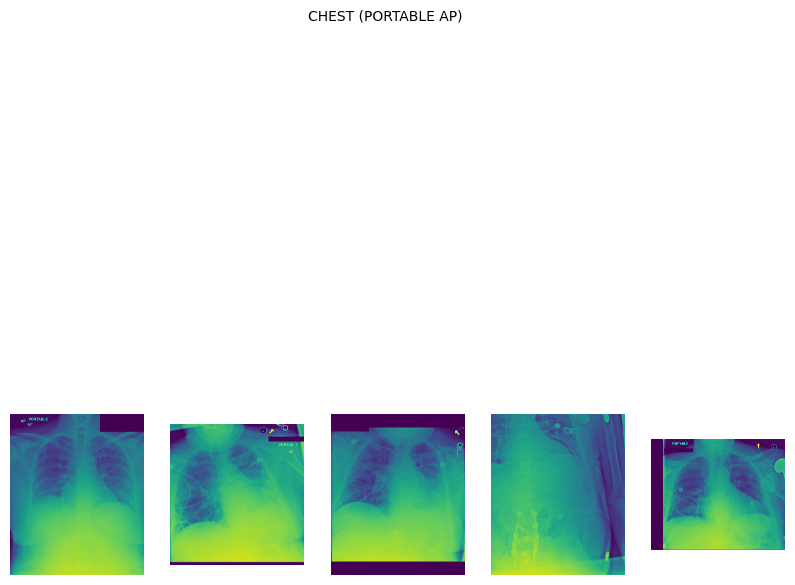

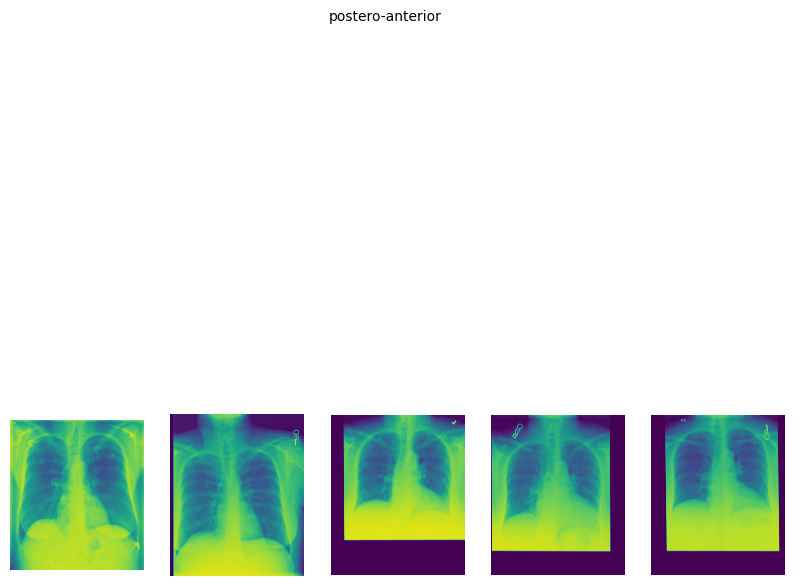

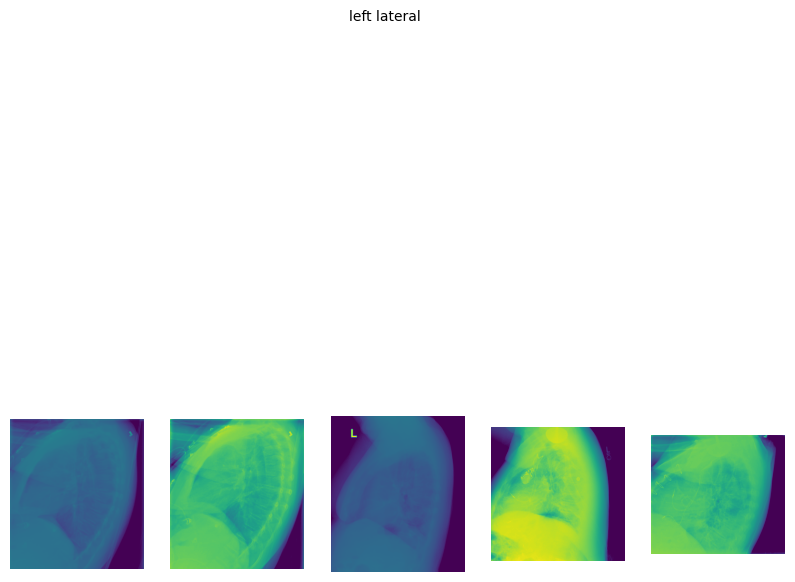

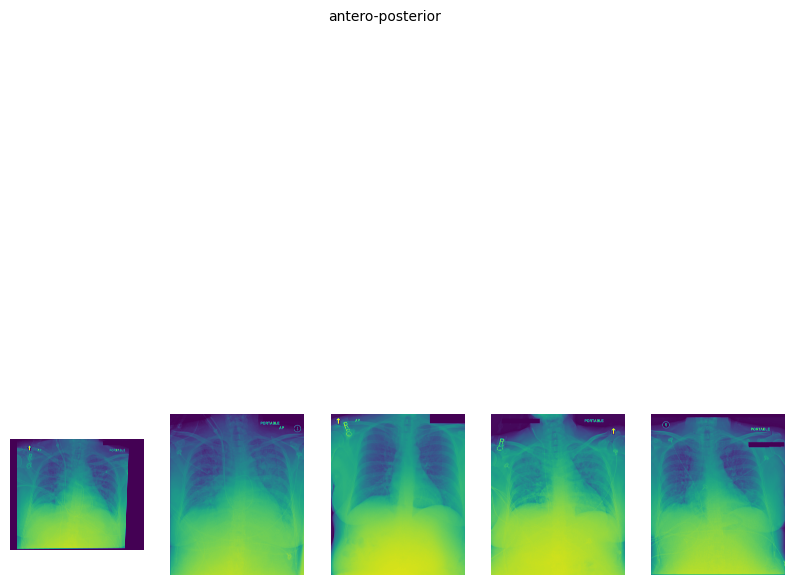

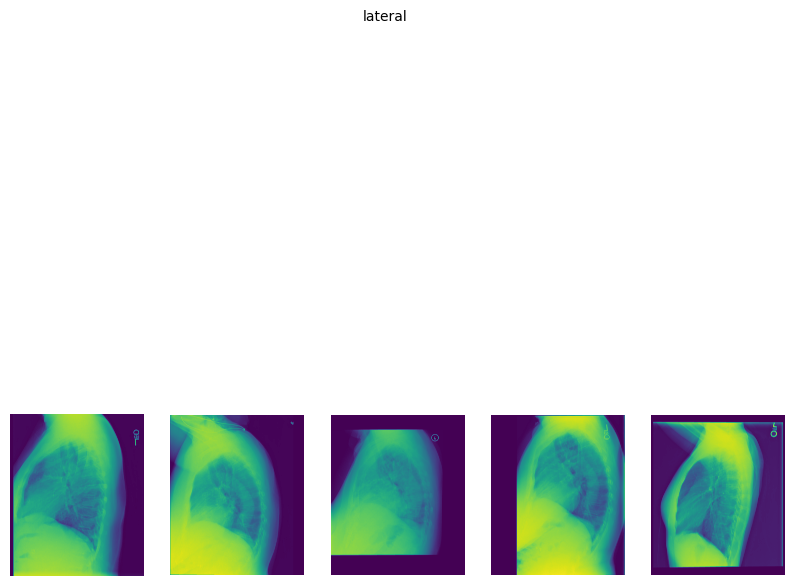

<Figure size 1000x1000 with 0 Axes>

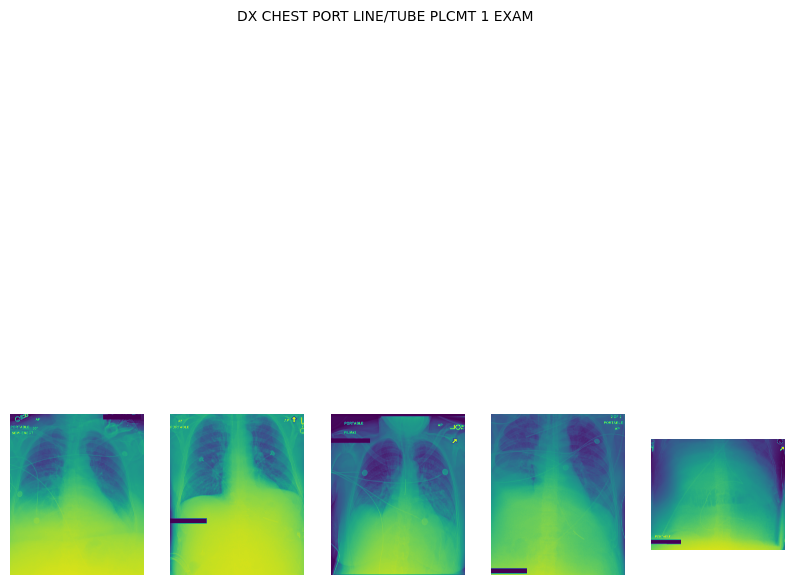

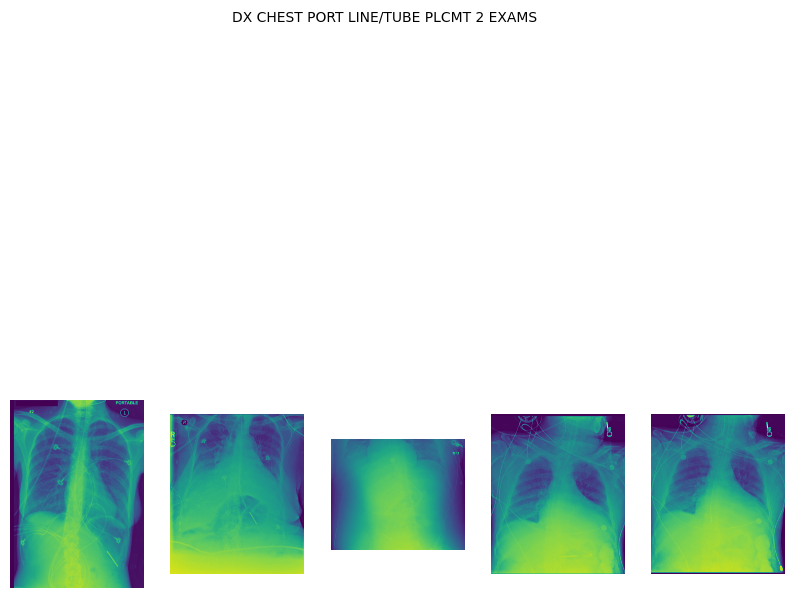

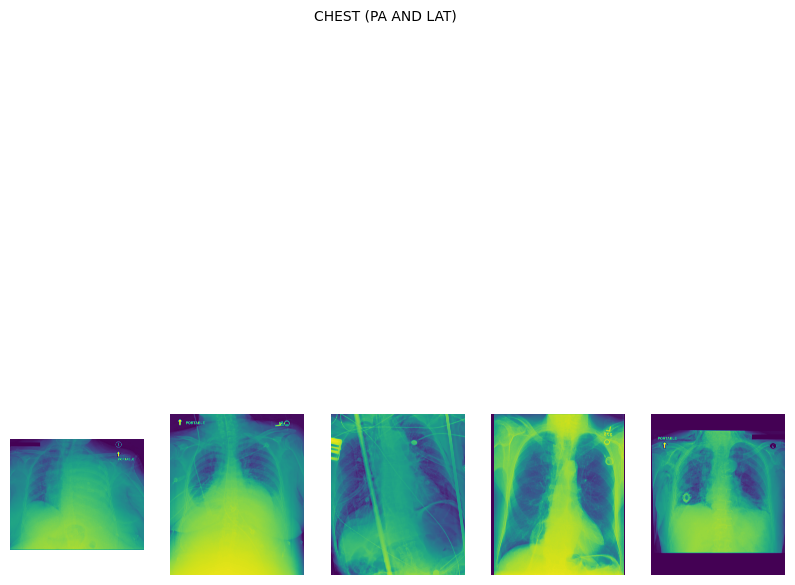

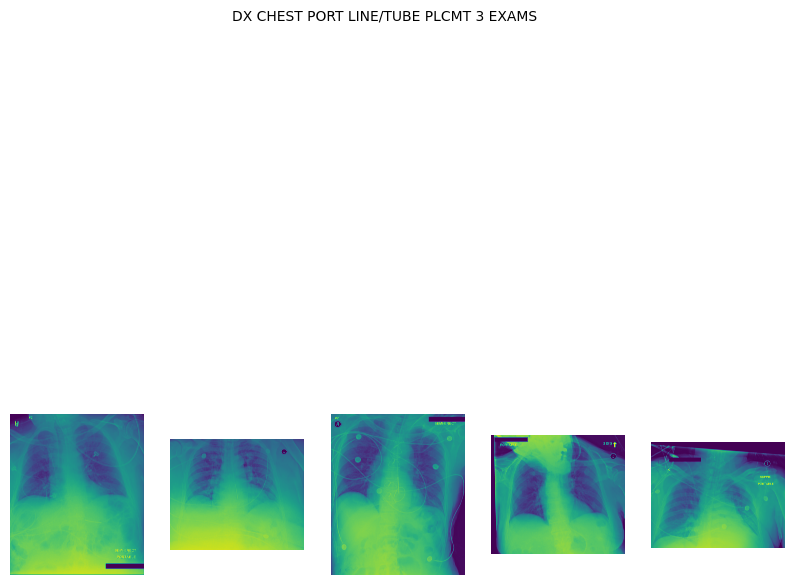

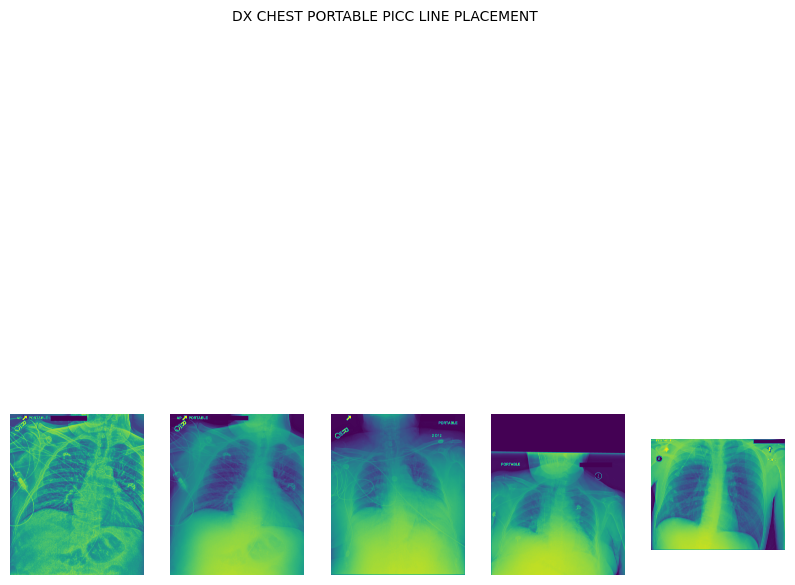

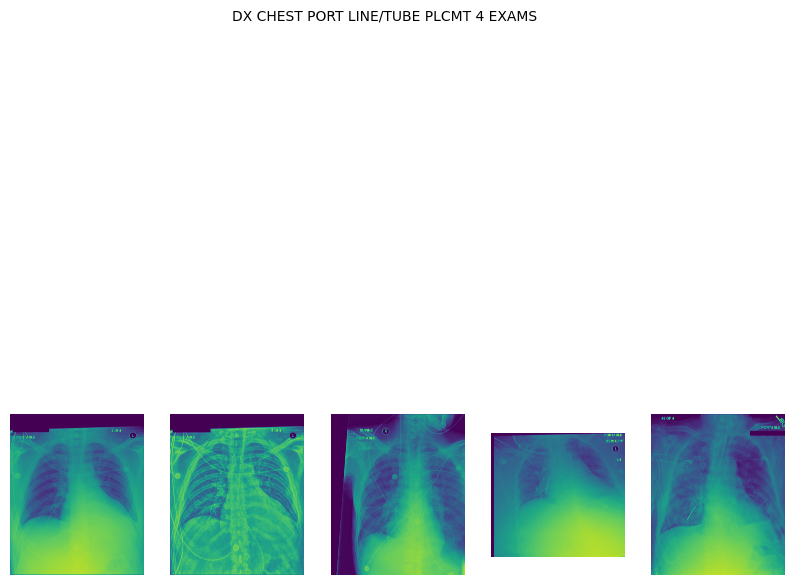

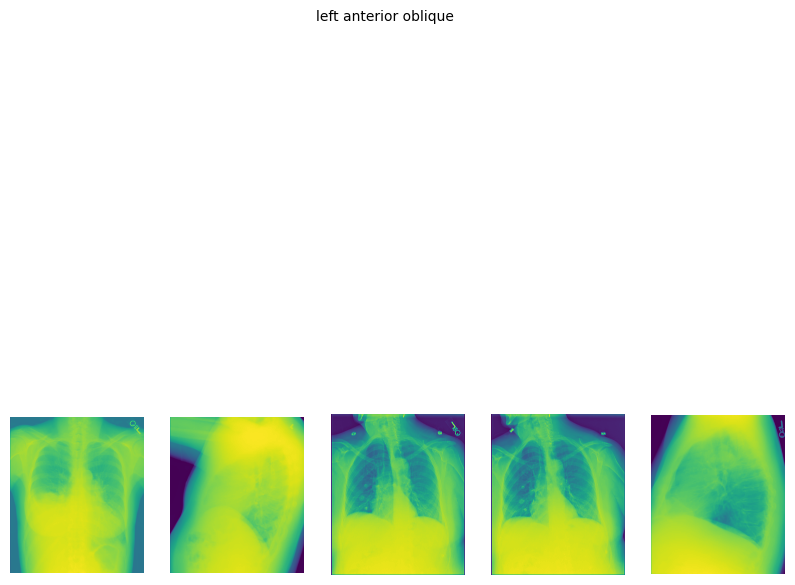

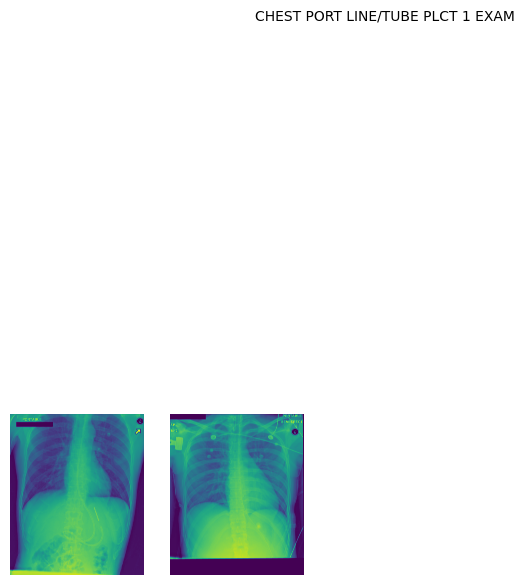

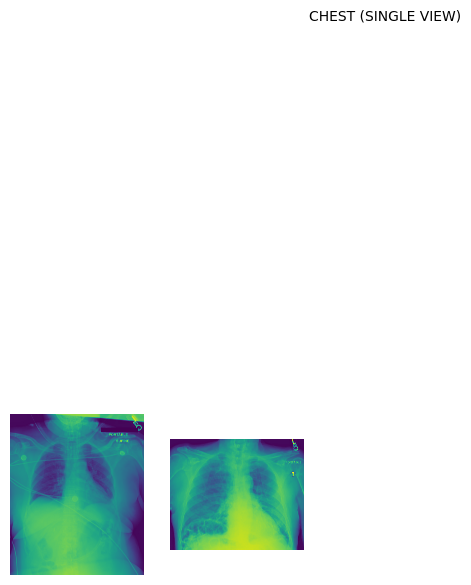

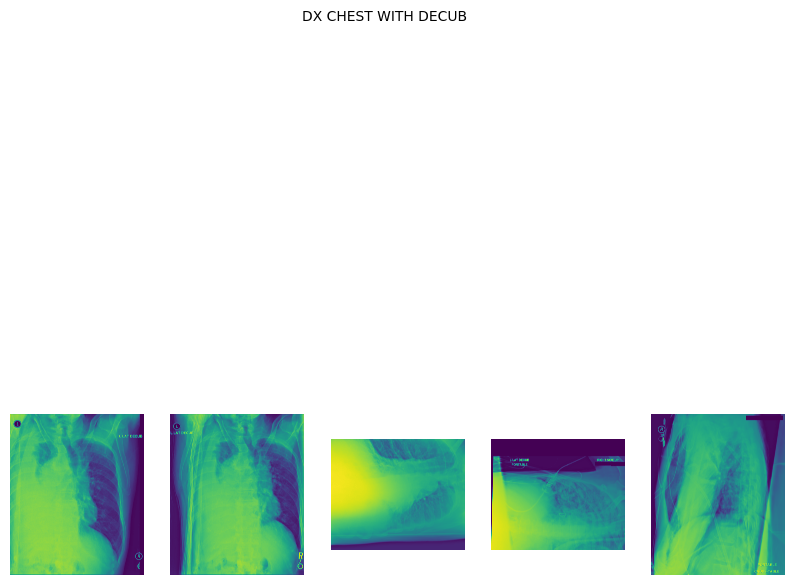

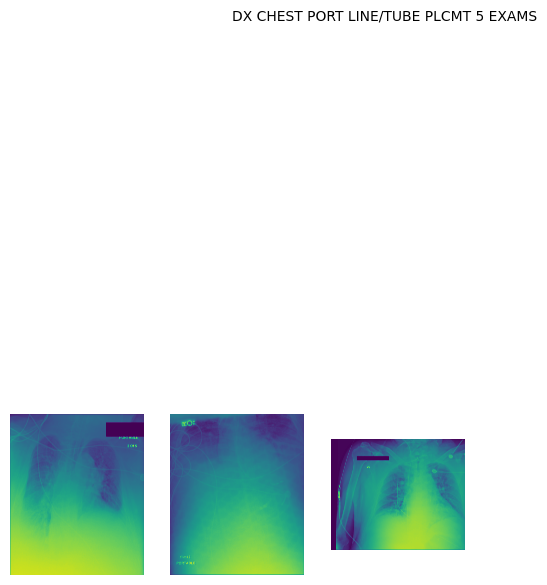

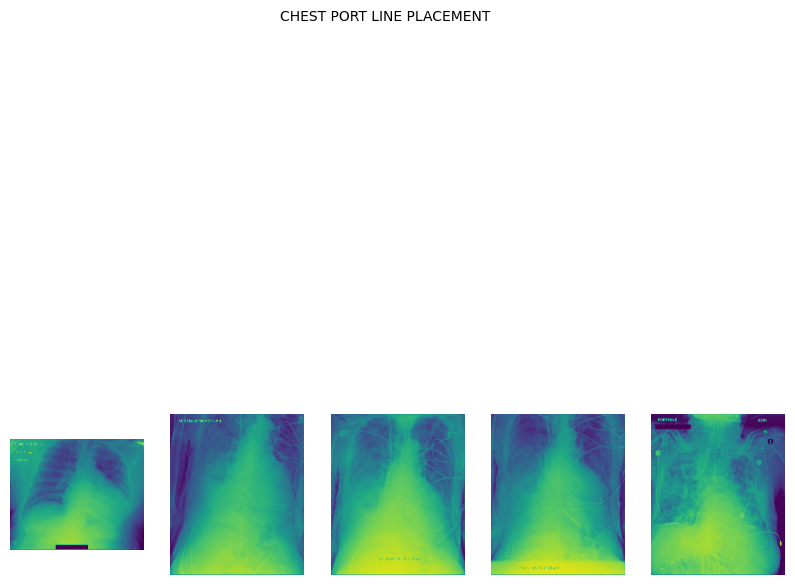

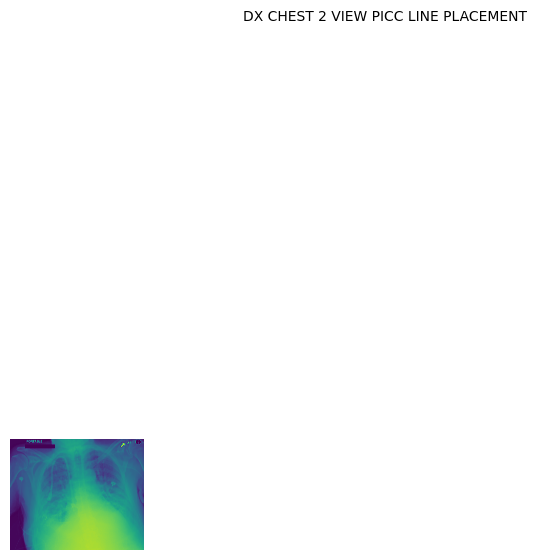

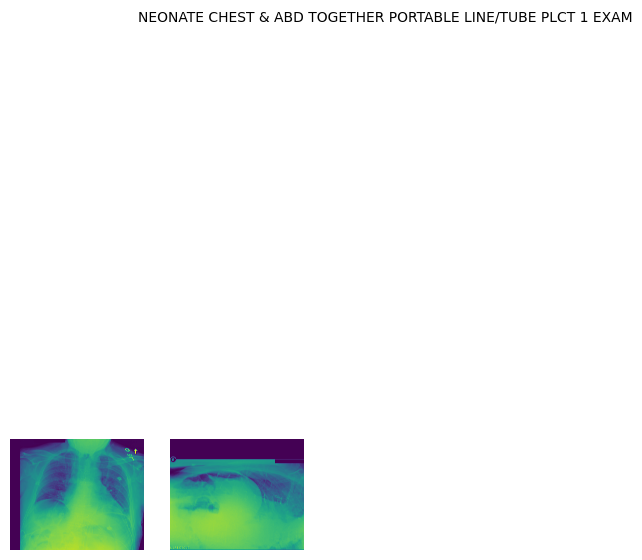

In [14]:


unique_str = df['ViewCodeSequence_CodeMeaning'].unique()

for i in unique_str:
    plt.figure(figsize=(10, 10))
    plt.suptitle(i, fontsize=10)
    
    images = df[df['ViewCodeSequence_CodeMeaning'] == i]['jpg_path'].iloc[:5]  # Get up to 3 images
    
    for j, image_path in enumerate(images):
        plt.subplot(1, 5, j+1)
        image = mpimg.imread(image_path)
        plt.imshow(image)
        plt.axis('off')
    
    plt.show()




In [15]:
# Count the occurrences of each unique value in the "ViewCodeSequence_CodeMeaning" column
view_counts = df['ViewCodeSequence_CodeMeaning'].value_counts()

# Print the table
print("View Frequency Table:")
print(view_counts)

View Frequency Table:
ViewCodeSequence_CodeMeaning
antero-posterior                                               122625
postero-anterior                                                96037
lateral                                                         82852
left lateral                                                    35029
CHEST (PORTABLE AP)                                             23761
DX CHEST PORT LINE/TUBE PLCMT 2 EXAMS                              72
DX CHEST PORTABLE PICC LINE PLACEMENT                              53
DX CHEST PORT LINE/TUBE PLCMT 1 EXAM                               51
DX CHEST PORT LINE/TUBE PLCMT 3 EXAMS                              41
CHEST (PA AND LAT)                                                 24
left anterior oblique                                              21
DX CHEST PORT LINE/TUBE PLCMT 4 EXAMS                              11
CHEST PORT LINE PLACEMENT                                           6
DX CHEST WITH DECUB                    

In [16]:
# Count the occurrences of each unique value in the "ViewCodeSequence_CodeMeaning" column
view_counts = df['ViewCodeSequence_CodeMeaning'].value_counts()

# Get the unique values with at least 25 occurrences
valid_values = view_counts[view_counts >= 80].index

# Filter the DataFrame to keep rows with valid values
filtered_df = df[df['ViewCodeSequence_CodeMeaning'].isin(valid_values)]

# Print the filtered DataFrame
print("Filtered DataFrame:")
filtered_df

Filtered DataFrame:


,jpg_name,PatientOrientationCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,ProcedureCodeSequence_CodeMeaning,study_id,jpg_path,Finding
0,d067947d-61c60fe1-b73bc826-356d3d2c-fd22bb48,antero-posterior,CHEST (PORTABLE AP),None,57682201,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,1
1,94cfab5d-c84c24dc-ebd79acf-b51bfecb-df30081b,Recumbent,postero-anterior,CHEST (PA AND LAT),55032644,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,0
2,78c46a20-ac46fddc-da7e8f14-eff8d7a7-4ffec0a5,Recumbent,left lateral,CHEST (PA AND LAT),55032644,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,0
3,432a51bb-85350756-4fcac5c3-20fcb8d9-11c91668,Recumbent,left lateral,CHEST (PA AND LAT),55032644,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,0
4,68ccd799-61e98428-3c7d8e41-6cbc342c-3426519b,Erect,antero-posterior,CHEST (PORTABLE AP),54345212,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,1
...,...,...,...,...,...,...,...
377089,1cbcbf77-915b4dac-21b02cc4-9a7fd042-0201e8d0,Erect,lateral,CHEST (PA AND LAT),53699756,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,1
377090,f6ccd72a-bdf76734-274736e7-71dc7f4b-74028b4a,Erect,postero-anterior,CHEST (PA AND LAT),59644954,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,0
377091,6d78f490-8978ed36-1db18555-d1299472-489988f7,Erect,left lateral,CHEST (PA AND LAT),59644954,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,0
377092,cbfca10f-79eedbb0-55762c24-c1bacd40-410cb689,Erect,postero-anterior,CHEST (PA AND LAT),55225072,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,0


In [17]:
# Count the occurrences of each unique value in the "ViewCodeSequence_CodeMeaning" column
view_counts = filtered_df['ViewCodeSequence_CodeMeaning'].value_counts()

# Print the table
print("View Frequency Table:")
print(view_counts)

View Frequency Table:
ViewCodeSequence_CodeMeaning
antero-posterior       122625
postero-anterior        96037
lateral                 82852
left lateral            35029
CHEST (PORTABLE AP)     23761
Name: count, dtype: int64


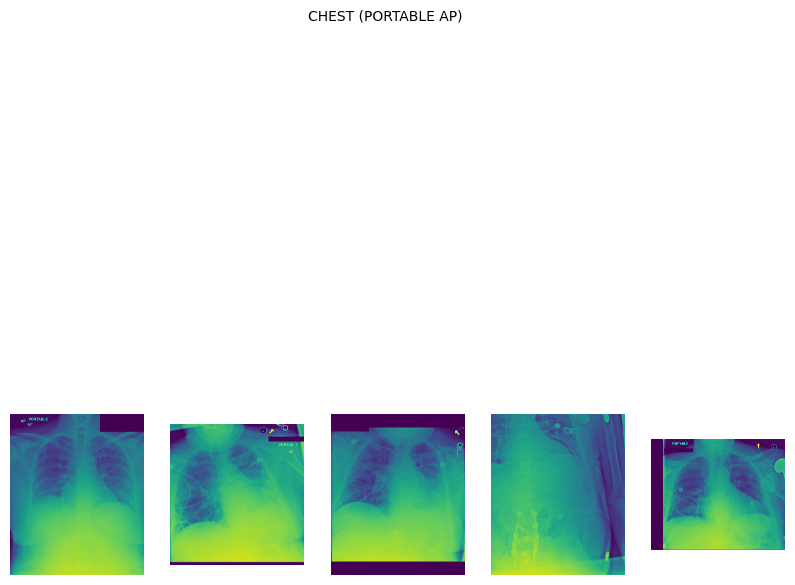

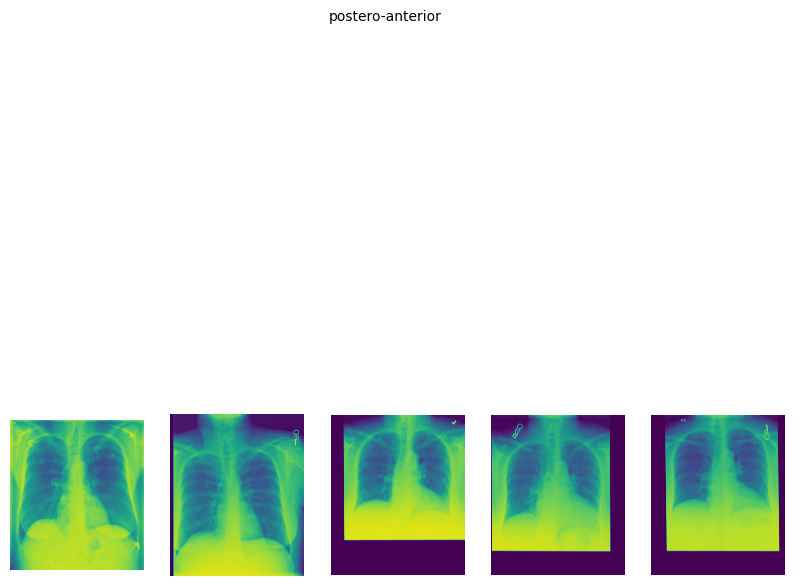

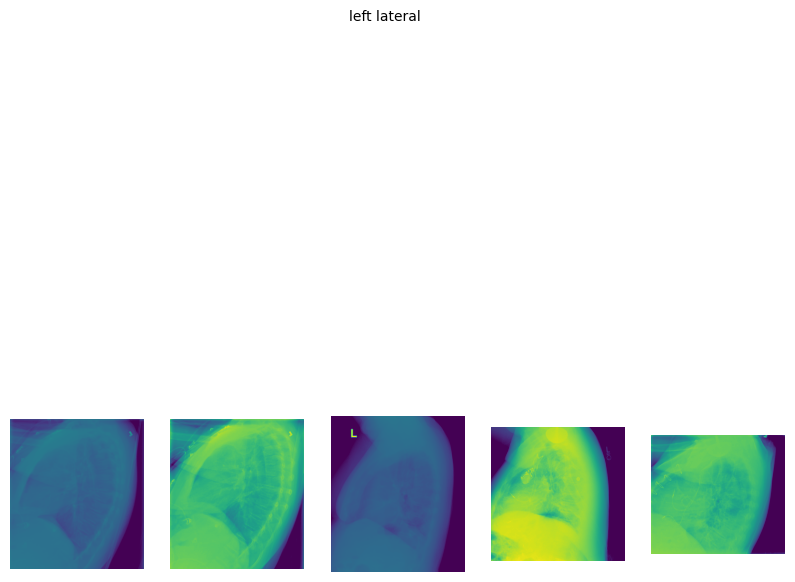

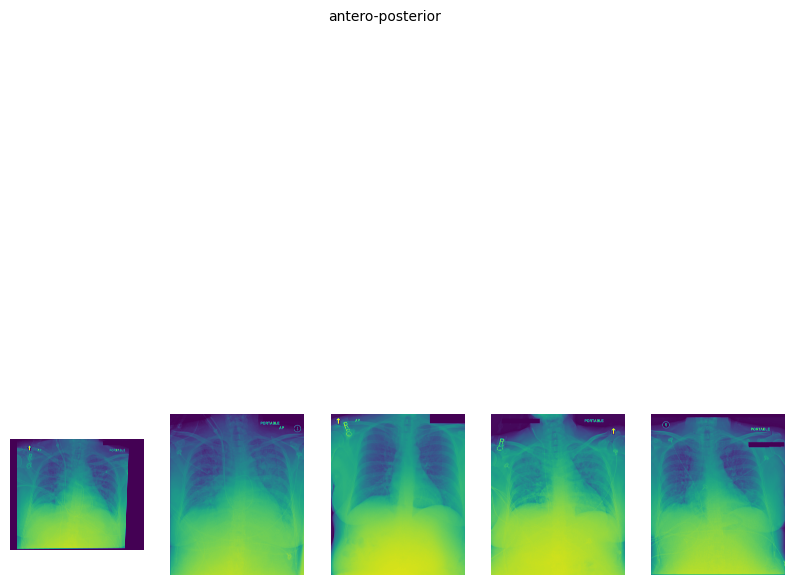

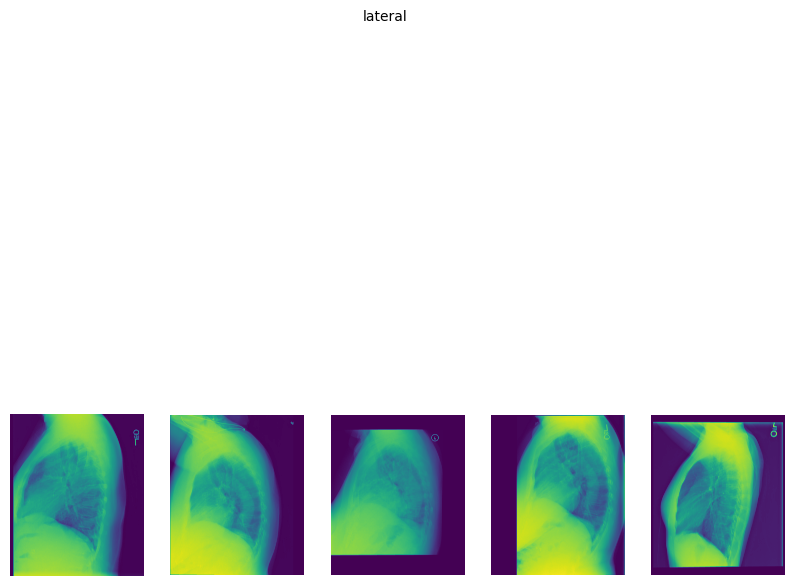

In [18]:
unique_str = filtered_df['ViewCodeSequence_CodeMeaning'].unique()

for i in unique_str:
    plt.figure(figsize=(10, 10))
    plt.suptitle(i, fontsize=10)
    
    images = filtered_df[filtered_df['ViewCodeSequence_CodeMeaning'] == i]['jpg_path'].iloc[:5]  # Get up to 3 images
    
    for j, image_path in enumerate(images):
        plt.subplot(1, 5, j+1)
        image = mpimg.imread(image_path)
        plt.imshow(image)
        plt.axis('off')
    
    plt.show()

In [19]:
# Add the "img_view" column based on conditions
filtered_df.loc[:, 'img_view'] = np.where(
    filtered_df['ViewCodeSequence_CodeMeaning'].isin(['left lateral', 'lateral']),
    'view2_lateral',
    'view1_frontal'
)

# Print the updated DataFrame
print("Updated DataFrame:")
filtered_df

Updated DataFrame:


/tmp/ipykernel_704636/3180454664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'img_view'] = np.where(


,jpg_name,PatientOrientationCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,ProcedureCodeSequence_CodeMeaning,study_id,jpg_path,Finding,img_view
0,d067947d-61c60fe1-b73bc826-356d3d2c-fd22bb48,antero-posterior,CHEST (PORTABLE AP),None,57682201,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,1,view1_frontal
1,94cfab5d-c84c24dc-ebd79acf-b51bfecb-df30081b,Recumbent,postero-anterior,CHEST (PA AND LAT),55032644,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,0,view1_frontal
2,78c46a20-ac46fddc-da7e8f14-eff8d7a7-4ffec0a5,Recumbent,left lateral,CHEST (PA AND LAT),55032644,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,0,view2_lateral
3,432a51bb-85350756-4fcac5c3-20fcb8d9-11c91668,Recumbent,left lateral,CHEST (PA AND LAT),55032644,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,0,view2_lateral
4,68ccd799-61e98428-3c7d8e41-6cbc342c-3426519b,Erect,antero-posterior,CHEST (PORTABLE AP),54345212,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,1,view1_frontal
...,...,...,...,...,...,...,...,...
377089,1cbcbf77-915b4dac-21b02cc4-9a7fd042-0201e8d0,Erect,lateral,CHEST (PA AND LAT),53699756,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,1,view2_lateral
377090,f6ccd72a-bdf76734-274736e7-71dc7f4b-74028b4a,Erect,postero-anterior,CHEST (PA AND LAT),59644954,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,0,view1_frontal
377091,6d78f490-8978ed36-1db18555-d1299472-489988f7,Erect,left lateral,CHEST (PA AND LAT),59644954,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,0,view2_lateral
377092,cbfca10f-79eedbb0-55762c24-c1bacd40-410cb689,Erect,postero-anterior,CHEST (PA AND LAT),55225072,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,0,view1_frontal


In [20]:
# Drop the three columns
filtered_df = filtered_df.drop(['PatientOrientationCodeSequence_CodeMeaning', 'ViewCodeSequence_CodeMeaning', 'ProcedureCodeSequence_CodeMeaning'], axis=1)
column_order = ['study_id', 'jpg_name', 'jpg_path', 'img_view', 'Finding']
filtered_df = filtered_df.reindex(columns=column_order)
filtered_df

,study_id,jpg_name,jpg_path,img_view,Finding
0,57682201,d067947d-61c60fe1-b73bc826-356d3d2c-fd22bb48,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,1
1,55032644,94cfab5d-c84c24dc-ebd79acf-b51bfecb-df30081b,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,0
2,55032644,78c46a20-ac46fddc-da7e8f14-eff8d7a7-4ffec0a5,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view2_lateral,0
3,55032644,432a51bb-85350756-4fcac5c3-20fcb8d9-11c91668,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view2_lateral,0
4,54345212,68ccd799-61e98428-3c7d8e41-6cbc342c-3426519b,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,1
...,...,...,...,...,...
377089,53699756,1cbcbf77-915b4dac-21b02cc4-9a7fd042-0201e8d0,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view2_lateral,1
377090,59644954,f6ccd72a-bdf76734-274736e7-71dc7f4b-74028b4a,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,0
377091,59644954,6d78f490-8978ed36-1db18555-d1299472-489988f7,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view2_lateral,0
377092,55225072,cbfca10f-79eedbb0-55762c24-c1bacd40-410cb689,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,0


In [21]:
path = 'data/csv/MIMIC_CXR/MIMIC_CXR/physionet.org/files/mimic-cxr/2.0.0/files'

In [22]:
path_list = []
for root, dirs, files in os.walk(path):
    for name in files:
        if name.endswith(".dcm"):
            path_list.append(os.path.join(root, name))

df = pd.DataFrame(path_list)
df = df[0].str.split('/', expand=True)
df            

#save the path_list as csv file
df.to_csv('data/csv/MIMIC_CXR/hageneder/metadata/path_list.csv', index=False)            

'path_list = []\nfor root, dirs, files in os.walk(path):\n    for name in files:\n        if name.endswith(".dcm"):\n            path_list.append(os.path.join(root, name))\n\ndf = pd.DataFrame(path_list)\ndf = df[0].str.split(\'/\', expand=True)\ndf            \n\n#save the path_list as csv file\ndf.to_csv(\'/system/user/publicdata/MIMIC_CXR/hageneder/metadata/path_list.csv\', index=False)            \n            '

In [23]:
path_df = pd.read_csv('data/csv/MIMIC_CXR/hageneder/metadata/path_list.csv')
path_df = path_df.iloc[:, -3:]
path_df.iloc[:, -1] = path_df.iloc[:, -1].str.replace('.dcm', '')
path_df = path_df.rename(columns={'12': 'patient_id', '13': 'study_id', '14': 'jpg_name'})
path_df = path_df.drop('study_id', axis=1)
path_df

,patient_id,jpg_name
0,p19932024,d067947d-61c60fe1-b73bc826-356d3d2c-fd22bb48
1,p19932024,94cfab5d-c84c24dc-ebd79acf-b51bfecb-df30081b
2,p19932024,78c46a20-ac46fddc-da7e8f14-eff8d7a7-4ffec0a5
3,p19932024,432a51bb-85350756-4fcac5c3-20fcb8d9-11c91668
4,p19932024,68ccd799-61e98428-3c7d8e41-6cbc342c-3426519b
...,...,...
377105,p15229370,f6ccd72a-bdf76734-274736e7-71dc7f4b-74028b4a
377106,p15229370,6d78f490-8978ed36-1db18555-d1299472-489988f7
377107,p15229370,cbfca10f-79eedbb0-55762c24-c1bacd40-410cb689
377108,p15229370,750b52ea-0a31513e-1eb47517-a4174b8d-494ec362


In [24]:
filtered_df = pd.merge(filtered_df, path_df[['jpg_name', 'patient_id']], on='jpg_name')
column_order = ['patient_id', 'study_id', 'jpg_name', 'jpg_path', 'img_view', 'Finding']
filtered_df = filtered_df.reindex(columns=column_order)
filtered_df = filtered_df.drop('Finding', axis=1)
filtered_df

,patient_id,study_id,jpg_name,jpg_path,img_view
0,p19932024,57682201,d067947d-61c60fe1-b73bc826-356d3d2c-fd22bb48,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal
1,p19932024,55032644,94cfab5d-c84c24dc-ebd79acf-b51bfecb-df30081b,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal
2,p19932024,55032644,78c46a20-ac46fddc-da7e8f14-eff8d7a7-4ffec0a5,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view2_lateral
3,p19932024,55032644,432a51bb-85350756-4fcac5c3-20fcb8d9-11c91668,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view2_lateral
4,p19932024,54345212,68ccd799-61e98428-3c7d8e41-6cbc342c-3426519b,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal
...,...,...,...,...,...
360299,p15068059,53699756,1cbcbf77-915b4dac-21b02cc4-9a7fd042-0201e8d0,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view2_lateral
360300,p15229370,59644954,f6ccd72a-bdf76734-274736e7-71dc7f4b-74028b4a,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal
360301,p15229370,59644954,6d78f490-8978ed36-1db18555-d1299472-489988f7,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view2_lateral
360302,p15229370,55225072,cbfca10f-79eedbb0-55762c24-c1bacd40-410cb689,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal


In [25]:
all_findings_df = pd.read_csv('data/csv/all_findings_df.csv')

In [26]:
all_findings_df = all_findings_df.fillna(0)
all_findings_df = all_findings_df.replace(-1.0, 0)
all_findings_df = all_findings_df.replace(0.0, 0)
all_findings_df = all_findings_df.replace(1.0, 1)
all_findings_df = all_findings_df.fillna(0)
all_findings_df['id'] = all_findings_df['id'].apply(lambda x: int(x[1:]) if x.startswith('s') else int(x))
all_findings_df = all_findings_df.astype(int)
all_findings_df = all_findings_df.rename(columns={'id': 'study_id'})

In [27]:
column_order = ['study_id', 'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']

all_findings_df = all_findings_df.reindex(columns=column_order)

all_findings_df

,study_id,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,50002405,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50003651,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,50006246,0,0,0,0,0,0,0,0,1,0,1,0,0,1
3,50008565,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,50008601,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227822,59992045,0,0,0,0,0,0,0,0,0,0,1,0,0,1
227823,59995675,0,0,1,0,0,0,0,0,1,0,1,0,0,1
227824,59995853,1,0,0,0,0,0,0,0,0,0,0,0,0,0
227825,59997822,0,0,1,0,0,1,0,0,0,0,1,0,0,1


In [28]:
ready_for_pre = pd.merge(filtered_df,all_findings_df, on='study_id')
ready_for_pre

,patient_id,study_id,jpg_name,jpg_path,img_view,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,p19932024,57682201,d067947d-61c60fe1-b73bc826-356d3d2c-fd22bb48,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,p19932024,55032644,94cfab5d-c84c24dc-ebd79acf-b51bfecb-df30081b,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,p19932024,55032644,78c46a20-ac46fddc-da7e8f14-eff8d7a7-4ffec0a5,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view2_lateral,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,p19932024,55032644,432a51bb-85350756-4fcac5c3-20fcb8d9-11c91668,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view2_lateral,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,p19932024,54345212,68ccd799-61e98428-3c7d8e41-6cbc342c-3426519b,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,0,0,1,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360299,p15068059,53699756,1cbcbf77-915b4dac-21b02cc4-9a7fd042-0201e8d0,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view2_lateral,0,0,0,0,0,0,0,1,0,0,0,0,0,0
360300,p15229370,59644954,f6ccd72a-bdf76734-274736e7-71dc7f4b-74028b4a,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,1,0,0,0,0,0,0,0,0,0,0,0,0,0
360301,p15229370,59644954,6d78f490-8978ed36-1db18555-d1299472-489988f7,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view2_lateral,1,0,0,0,0,0,0,0,0,0,0,0,0,0
360302,p15229370,55225072,cbfca10f-79eedbb0-55762c24-c1bacd40-410cb689,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
# Save filtered_df to a CSV file
ready_for_pre.to_csv('data/csv/df_with_view/ready_for_pre.csv', index=False)

In [36]:
# Create a DataFrame for view1
view1_df = ready_for_pre[ready_for_pre['img_view'] == 'view1_frontal']
view1_df = view1_df.reset_index(drop=True)
# Create a DataFrame for view2
view2_df = ready_for_pre[ready_for_pre['img_view'] == 'view2_lateral']
view2_df = view2_df.reset_index(drop=True)

In [37]:
view1_df

,patient_id,study_id,jpg_name,jpg_path,img_view,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,p19932024,57682201,d067947d-61c60fe1-b73bc826-356d3d2c-fd22bb48,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,p19932024,55032644,94cfab5d-c84c24dc-ebd79acf-b51bfecb-df30081b,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,p19932024,54345212,68ccd799-61e98428-3c7d8e41-6cbc342c-3426519b,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,p19932024,50963033,fc325dc2-bf224206-062f3c9e-47aae515-4ef25cc0,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,0,0,1,1,0,1,0,0,1,0,0,0,0,1
4,p19932024,58958645,f77e46ef-2fa9d49a-1defe019-ac2c199d-7695e244,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242418,p15013421,55314230,93a3c647-aea8daa2-0fc33487-10b198b7-dbe9eb7a,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,0,0,1,1,0,0,0,0,0,0,1,0,0,1
242419,p15013421,55314230,ba5ca039-5009ab8f-9e9f3360-79a47779-d0a64d20,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,0,0,1,1,0,0,0,0,0,0,1,0,0,1
242420,p15068059,53699756,e7497304-49f0ae02-e1aff025-13cd422b-28bb3373,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,0,0,0,0,0,0,0,1,0,0,0,0,0,0
242421,p15229370,59644954,f6ccd72a-bdf76734-274736e7-71dc7f4b-74028b4a,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
view2_df

,patient_id,study_id,jpg_name,jpg_path,img_view,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,p19932024,55032644,78c46a20-ac46fddc-da7e8f14-eff8d7a7-4ffec0a5,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view2_lateral,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,p19932024,55032644,432a51bb-85350756-4fcac5c3-20fcb8d9-11c91668,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view2_lateral,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,p19932024,52421327,7d918df3-b51f08b1-b7c9a415-2be08ec7-a1b1bd81,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view2_lateral,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,p19877597,55061019,ba32dc77-813ff369-34f6260f-426dd141-0ed1583d,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view2_lateral,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,p19877597,56096844,7cd9ab88-183b714d-27299813-35e34911-04974089,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view2_lateral,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117876,p15013421,55486086,6ea27ab8-5a40927b-d3b08249-e9d0a332-20b86c15,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view2_lateral,0,0,1,0,0,0,0,0,0,0,0,0,0,0
117877,p15013421,57635551,c02ddfbc-24882804-0409cb86-d002903c-4c639607,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view2_lateral,0,0,0,0,0,1,0,0,0,0,0,0,0,1
117878,p15068059,53699756,1cbcbf77-915b4dac-21b02cc4-9a7fd042-0201e8d0,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view2_lateral,0,0,0,0,0,0,0,1,0,0,0,0,0,0
117879,p15229370,59644954,6d78f490-8978ed36-1db18555-d1299472-489988f7,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view2_lateral,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
# Save filtered_df to a CSV file
filtered_df.to_csv('data/csv/df_with_view/filtered_df.csv', index=False)

# Save view1_df to a CSV file
view1_df.to_csv('data/csv/df_with_view/view1_df.csv', index=False)

# Save view2_df to a CSV file
view2_df.to_csv('data/csv/df_with_view/view2_df.csv', index=False)

In [2]:
import pandas as pd


In [6]:
view1_df = pd.read_csv('data/csv/df_with_view/view1_df.csv')
view1_df.head(1)


,patient_id,study_id,jpg_name,jpg_path,img_view,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,p19932024,57682201,d067947d-61c60fe1-b73bc826-356d3d2c-fd22bb48,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [5]:
embedding_target_df = pd.read_csv('data/csv/embedding_target_df.csv')
embedding_target_df.head(1)


,study_id,jpg_path,jpg_name,embedding_path_cloob_rn50_yfcc_epoch_28,embedding_path_clip_rn50_yfcc_epoch_28,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,50414267,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,/system/user/publicdata/MIMIC_CXR/hageneder/em...,/system/user/publicdata/MIMIC_CXR/hageneder/em...,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
test = pd.merge(view1_df, embedding_target_df[['jpg_name','embedding_path_cloob_rn50_yfcc_epoch_28', 'embedding_path_clip_rn50_yfcc_epoch_28']], on='jpg_name')
test

,patient_id,study_id,jpg_name,jpg_path,img_view,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,embedding_path_cloob_rn50_yfcc_epoch_28,embedding_path_clip_rn50_yfcc_epoch_28
0,p19932024,57682201,d067947d-61c60fe1-b73bc826-356d3d2c-fd22bb48,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,0,0,1,0,0,...,0,0,0,0,0,0,0,0,/system/user/publicdata/MIMIC_CXR/hageneder/em...,/system/user/publicdata/MIMIC_CXR/hageneder/em...
1,p19932024,55032644,94cfab5d-c84c24dc-ebd79acf-b51bfecb-df30081b,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,1,0,0,0,0,...,0,0,0,0,0,0,0,0,/system/user/publicdata/MIMIC_CXR/hageneder/em...,/system/user/publicdata/MIMIC_CXR/hageneder/em...
2,p19932024,54345212,68ccd799-61e98428-3c7d8e41-6cbc342c-3426519b,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,0,0,1,0,0,...,0,0,0,0,0,0,0,1,/system/user/publicdata/MIMIC_CXR/hageneder/em...,/system/user/publicdata/MIMIC_CXR/hageneder/em...
3,p19932024,50963033,fc325dc2-bf224206-062f3c9e-47aae515-4ef25cc0,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,0,0,1,1,0,...,0,0,1,0,0,0,0,1,/system/user/publicdata/MIMIC_CXR/hageneder/em...,/system/user/publicdata/MIMIC_CXR/hageneder/em...
4,p19932024,58958645,f77e46ef-2fa9d49a-1defe019-ac2c199d-7695e244,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,1,0,0,0,0,...,0,0,0,0,0,0,0,0,/system/user/publicdata/MIMIC_CXR/hageneder/em...,/system/user/publicdata/MIMIC_CXR/hageneder/em...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242418,p15013421,55314230,93a3c647-aea8daa2-0fc33487-10b198b7-dbe9eb7a,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,0,0,1,1,0,...,0,0,0,0,1,0,0,1,/system/user/publicdata/MIMIC_CXR/hageneder/em...,/system/user/publicdata/MIMIC_CXR/hageneder/em...
242419,p15013421,55314230,ba5ca039-5009ab8f-9e9f3360-79a47779-d0a64d20,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,0,0,1,1,0,...,0,0,0,0,1,0,0,1,/system/user/publicdata/MIMIC_CXR/hageneder/em...,/system/user/publicdata/MIMIC_CXR/hageneder/em...
242420,p15068059,53699756,e7497304-49f0ae02-e1aff025-13cd422b-28bb3373,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,0,0,0,0,0,...,0,1,0,0,0,0,0,0,/system/user/publicdata/MIMIC_CXR/hageneder/em...,/system/user/publicdata/MIMIC_CXR/hageneder/em...
242421,p15229370,59644954,f6ccd72a-bdf76734-274736e7-71dc7f4b-74028b4a,/system/user/publicdata/MIMIC_CXR/hageneder/JP...,view1_frontal,1,0,0,0,0,...,0,0,0,0,0,0,0,0,/system/user/publicdata/MIMIC_CXR/hageneder/em...,/system/user/publicdata/MIMIC_CXR/hageneder/em...


In [9]:
test.to_csv('data/csv/frontal_with_embedding.csv', index=False)